In [10]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt


In [11]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# It's legacy, Now we can backpropagtion just use torch.Tensor.
# same this, w = torch.Tensor([1.0])
# w = Variable(torch.Tensor([1.0]), requires_grad=True) # Any random value
w = torch.tensor([1.0], requires_grad = True)

In [12]:
# our model forward pass
def forward(x):
    return x * w

In [13]:
# Loss function
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2

In [14]:
# Before training
print("Prediction (before training)", 4, forward(4).item())

Prediction (before training) 4 4.0


### `torch.tensor.item`
텐서 안의 값을 가져옴.

```python
>>> x = torch.tensor([1.0])
>>> x.item()
1.0
```

In [30]:
w_list = []
mse_list = []

# Training loop
for epoch in range(10):
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) # 1) Forward pss
        l = loss(y_pred, y_val) # 2) Compute loss
        l_sum += l.item()
        l.backward() # 3) Backpropgation to update weights (compute gradient)
        print("\t grad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()
        
        
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()
        
    w_list.append(w.data.item())
    mse_list.append(l_sum / 3)
        
    print(f"Epoch: {epoch} | Loss: {l.item()}")
    


	 grad:  1.0 2.0 -0.004759550094604492
	 grad:  2.0 4.0 -0.018657684326171875
	 grad:  3.0 6.0 -0.038620948791503906
Epoch: 0 | Loss: 4.143271507928148e-05
	 grad:  1.0 2.0 -0.003518819808959961
	 grad:  2.0 4.0 -0.0137939453125
	 grad:  3.0 6.0 -0.028553009033203125
Epoch: 1 | Loss: 2.264650902361609e-05
	 grad:  1.0 2.0 -0.00260162353515625
	 grad:  2.0 4.0 -0.010198593139648438
	 grad:  3.0 6.0 -0.021108627319335938
Epoch: 2 | Loss: 1.2377059647405986e-05
	 grad:  1.0 2.0 -0.0019233226776123047
	 grad:  2.0 4.0 -0.0075397491455078125
	 grad:  3.0 6.0 -0.0156097412109375
Epoch: 3 | Loss: 6.768445018678904e-06
	 grad:  1.0 2.0 -0.0014221668243408203
	 grad:  2.0 4.0 -0.0055751800537109375
	 grad:  3.0 6.0 -0.011541366577148438
Epoch: 4 | Loss: 3.7000872907810844e-06
	 grad:  1.0 2.0 -0.0010514259338378906
	 grad:  2.0 4.0 -0.0041217803955078125
	 grad:  3.0 6.0 -0.008531570434570312
Epoch: 5 | Loss: 2.021880391112063e-06
	 grad:  1.0 2.0 -0.0007772445678710938
	 grad:  2.0 4.0 -0.0030

In [31]:
# After trainig
print("Prediction (after training)", 4, forward(4).item())

Prediction (after training) 4 7.99953556060791


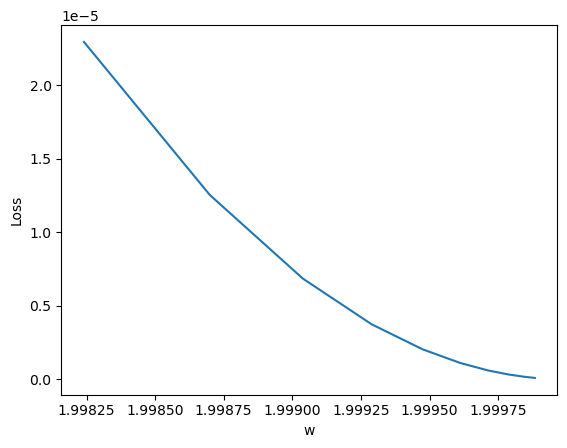

In [36]:
# Practice: Draw graph
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()